<span class='note'><i>Make me look good.</i> Click on the cell below and press <kbd>Ctrl</kbd>+<kbd>Enter</kbd>.</span>

In [1]:
from IPython.core.display import HTML
HTML(open('css/custom.css', 'r').read())

<h5 class='prehead'>SM286D &middot; Introduction to Applied Mathematics with Python &middot; Spring 2020 &middot; Uhan</h5>

<h5 class='lesson'>Lesson 10.</h5>

<h1 class='lesson_title'>Using spreadsheets with Python</h1>

## This lesson...

- Making Python work with Excel using the xlwings package

---

## Before we begin, some Excel terminology

- A __workbook__ is an Excel spreadsheet file. 

- A workbook consists of one or more __worksheets__ (or __sheets__).
    - You can access different sheets in a workbook with the tabs at the bottom of the Excel window.

- A sheet consists of a matrix of __cells__.
    - Most data in a sheet must be placed in a cell. (Exceptions include charts, special text boxes, etc.)

- A __cell range__ is a collection of cells.

---

## A short introduction to xlwings

- [xlwings](https://www.xlwings.org/) is a free, open source package that allows Python to connect to Microsoft Excel.  
    - xlwings is included with Anaconda, but may need to be installed separately if you use a different Python distribution.
    - [xlwings Documentation](https://docs.xlwings.org/en/stable/)

- Let's look at an example of how to use xlwings.

- In the same folder as this notebook, there is a file called `PopulationByState2018.xlsx`. This is an Excel workbook. Open this workbook in Excel.

- Let's start by:
    - importing xlwings,
    - defining the path to the workbook, and
    - creating an xlwings Workbook object that points to `PopulationByState2018.xlsx`.

In [2]:
# Import xlwings
import xlwings as xw

# Define the path to the Excel workbook we want to open
filename = 'PopulationByState2018.xlsx'

# Create a Book object that points to the Excel workbook
wb = xw.Book(filename)

- _Pro tips._
    - Open the workbook you want to work with in Excel before doing anything with xlwings.
    - Use a path/filename that **DOES NOT** contain spaces.

- We can access a particular sheet in an Excel workbook like this:

In [3]:
# Grab the data from the "Population" sheet
data = wb.sheets['Population']

<img src="img/population_sheet.png" width=50%>
<center> Figure 1. The "Population" sheet.</center>

- We can store the information in the cells from A2 to A51 in a variable called `state_names` like this:

In [4]:
# Grab state names from the sheet
state_names = data.range('A2', 'A51').value

<img src="img/column_A.png" width=25%>
<center> Figure 2. Column A.</center>

- What is the type of `state_names`?

In [5]:
print(type(state_names))

<class 'list'>


- We can print the value of `state_names` to check that we have all the information that we are expecting:

In [6]:
print(state_names)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


- Using code similar to what we wrote for `state_names`, we can read the state popluations from the spreadsheet:

In [7]:
# Grab state populations from the sheet
state_populations = data.range('B2', 'B51').value

# Check our work
print(state_populations)

[4887871.0, 737438.0, 7171646.0, 3013825.0, 39557045.0, 5695564.0, 3572665.0, 967171.0, 21299325.0, 10519475.0, 1420491.0, 1754208.0, 12741080.0, 6691878.0, 3156145.0, 2911505.0, 4468402.0, 4659978.0, 1338404.0, 6042718.0, 6902149.0, 9995915.0, 5611179.0, 2986530.0, 6126452.0, 1062305.0, 1929268.0, 3034392.0, 1356458.0, 8908520.0, 2095428.0, 19542209.0, 10383620.0, 760077.0, 11689442.0, 3943079.0, 4190713.0, 12807060.0, 1057315.0, 5084127.0, 882235.0, 6770010.0, 28701845.0, 3161105.0, 626299.0, 8517685.0, 7535591.0, 1805832.0, 5813568.0, 577737.0]


- Now that we've read the data from the spreadsheet, we can work with it in Python.  

- First, let's make a dictionary that maps states to populations:

In [8]:
# Initialize dictionary
population = {}

# Add entries to dictionary
# Convert population values to integers
for i in range(len(state_names)):
    population[state_names[i]] = int(state_populations[i])

# Check our work
print(population)

{'Alabama': 4887871, 'Alaska': 737438, 'Arizona': 7171646, 'Arkansas': 3013825, 'California': 39557045, 'Colorado': 5695564, 'Connecticut': 3572665, 'Delaware': 967171, 'Florida': 21299325, 'Georgia': 10519475, 'Hawaii': 1420491, 'Idaho': 1754208, 'Illinois': 12741080, 'Indiana': 6691878, 'Iowa': 3156145, 'Kansas': 2911505, 'Kentucky': 4468402, 'Louisiana': 4659978, 'Maine': 1338404, 'Maryland': 6042718, 'Massachusetts': 6902149, 'Michigan': 9995915, 'Minnesota': 5611179, 'Mississippi': 2986530, 'Missouri': 6126452, 'Montana': 1062305, 'Nebraska': 1929268, 'Nevada': 3034392, 'New Hampshire': 1356458, 'New Jersey': 8908520, 'New Mexico': 2095428, 'New York': 19542209, 'North Carolina': 10383620, 'North Dakota': 760077, 'Ohio': 11689442, 'Oklahoma': 3943079, 'Oregon': 4190713, 'Pennsylvania': 12807060, 'Rhode Island': 1057315, 'South Carolina': 5084127, 'South Dakota': 882235, 'Tennessee': 6770010, 'Texas': 28701845, 'Utah': 3161105, 'Vermont': 626299, 'Virginia': 8517685, 'Washington': 

- Next, we can find the state with the largest population:

In [9]:
# Initialize maximum population and corresponding state
max_pop = -float("inf")
max_pop_state = ""

# Iterate over dictionary and update maximum population and corresponding state
for state, pop in population.items():
    if pop > max_pop:
        max_pop = pop
        max_pop_state = state

# Print our findings
print(f"The state with the largest population is {max_pop_state}, with a population of {max_pop}.")

The state with the largest population is California, with a population of 39557045.


- We can also find the state with the smallest population:

In [10]:
# Initialize minimum population and corresponding state
min_pop = float("inf")
min_pop_state = ""

# Iterate over dictionary and update minimum population and corresponding state
for state, pop in population.items():
    if pop < min_pop:
        min_pop = pop
        min_pop_state = state

# Print our findings
print(f"The state with the smallest population is {min_pop_state}, with a population of {min_pop}.")

The state with the smallest population is Wyoming, with a population of 577737.


- Now that we've done some analysis on the data in Python, we can write the results of the analysis back to the Excel worbook.

- First, let's manually create a new worksheet in the Excel workbook:
    - Click on the + sign at the bottom of the Excel file near the __Population__ worksheet tab.
    - After you click on the + sign, Excel will create a new sheet called __Sheet1__ by default.
    - Right-click on the name __Sheet1__ and select __Rename__.
    - Change the name of the worksheet to __Stats__ as shown in the image below.

<img src="img/add_sheet.png" width=50%>
<center> Figure 3. Manually adding a worksheet to an Excel file.</center>

<img src="img/stats_sheet.png" width=50%>
<center> Figure 4. New worksheet named "Stats".</center>

- Later, we'll see how you can add a worksheet directly from Python using xlwings.  

- We can now write our results back to the newly created worksheet, `Stats`, like this:

In [11]:
# Create a link to the "Stats" sheet
stats = wb.sheets['Stats']

# Create the column headings
stats.range('A1', 'B1').value = ['Name', 'Population']

# Write the name and population for the state that has the largest population
stats.range('A2', 'B2').value = [max_pop_state, max_pop]

# Write a description of this information
stats.range('C2').value = "This state has the largest population."

# Now write the name and population for the state that has the smallest population
stats.range('A3', 'B3').value = [min_pop_state, min_pop]

# Write a description of this information
stats.range('C3').value = "This state has the smallest population."

- Your code should produce output like that shown in the figure below.  

- Don't forget to save your finished spreadsheet by clicking on the image of the disk at the top left corner of the Excel window.

<img src="img/output.png" width=50%>
<center>Figure 5. Results written back to spreadsheet.</center>

---

## xlwings Quickstart &mdash; on your own

We will begin with some small examples from the xlwings Quickstart, which can be found [here](https://docs.xlwings.org/en/stable/quickstart.html).

1\. Begin by creating a new Excel workbook, and save it to the same folder as this notebook, with the file name `Lesson10.xlsx`.

2\. We can establish a connection to this Excel workbook using the following commands. 

In [12]:
# Import xlwings
import xlwings as xw

# Create a Book object that points to the Excel workbook
# To avoid headache, do NOT use file names and paths with spaces
wb = xw.Book('Lesson10.xlsx')

_Pro tip._ To avoid headache, do **not** file names and paths with spaces.

3\.  Next we will create a link to the worksheet __Sheet1__ in the Excel file, and write a value to that worksheet.

In [13]:
# Create Sheet object and link it to Sheet1
sht = wb.sheets['Sheet1']

# Write value "Foo 1" to cell A1 on Sheet1
sht.range('A1').value = 'Foo 1'

4\.  We can also read values from the spreadsheet.

In [14]:
# Read value from cell A1 on Sheet1
my_str = sht.range('A1').value

# Print this value
print(my_str)

Foo 1


5\. We can also add a worksheet to an existing Excel workbook.

In [15]:
# Add worksheet to our workbook
# Call it Data, place it after Sheet1
# We can access this new worksheet in Python with data_sht
data_sht = wb.sheets.add('Data', after='Sheet1')

_Pro tip._ You will get an error if you try to add a sheet with a name that already exists in the Excel file.

6\. We can read single cells using xlwings. By default, single cells are returned either as `float`, `unicode`, `None`, or `datetime` objects depending on whether the cell contains a number, a string, is empty, or represents a date, respectively. Below is an example of a float value being read:

In [16]:
# Float example
data_sht.range('A1').value = 1
print(data_sht.range('A1').value)

1.0


Here is an example of a unicode value being read:

In [17]:
# Unicode example
data_sht.range('A2').value = 'Hello'
print(data_sht.range('A2').value)

Hello


Here is an example of a `None` value (empty cell) being read:

In [18]:
# None example
print(data_sht.range('A3').value is None) # This should evaluate to True in Python

True


Note that the code in the cell above will evaluate to `True` because there is no entry in cell A3.

7\.  We can also handle lists with xlwings.  We begin by looking at one dimensional lists.  When working with one dimensional lists, ranges that represent rows or columns in Excel are returned as simple lists, which means that once they are in Python, you will lose the information about their orientation.  

Note that with xlwings, you only need to specify the top left cell when writing a list, a NumPy array, or a Pandas DataFrame to Excel.

In [19]:
# Write values 1-5 to cells D1-D5 on the sheet Data
data_sht.range('D1').value = [[1], [2], [3], [4], [5]] # Column orientation

# Grab values in cells D1-D5 and print them
five_values = data_sht.range('D1:D5').value
print(five_values)

[1.0, 2.0, 3.0, 4.0, 5.0]


Notes:
- We only had to specify cell D1 in the `range` method to identify the top left cell when writing to the spreadsheet.  
- When we grab the values in cells D1-D5 in line 5 and print them, they are printed as a row even though they came from a column in Excel.

In [20]:
# Write values 1-5 to cells D1-H1 on the sheet Data
data_sht.range('D1').value = [1, 2, 3, 4, 5] # Row orientation

# Grab values in cells D1-H1 and print them
five_other_values = data_sht.range('D1:H1').value
print(five_other_values)

[1.0, 2.0, 3.0, 4.0, 5.0]


We can force a single cell to arrive as a list in Python like this:

In [21]:
# To force a single cell to arrive as a list, use:
force_list = data_sht.range('D1').options(ndim=1).value

# Note that this is a list with a single element, not a numeric value
print(force_list)

[1.0]


8\.  If you want the row or column orientation to be preserved, you should set `ndim=2` in the `range` options.  This will return the ranges as nested, or two dimensional, lists.

In [22]:
# Read values from cells D1-D5, preserving column orientation
twod_column = data_sht.range('D1:D5').options(ndim=2).value

# Note that this is a list of lists
print(twod_column)

[[1.0], [2.0], [3.0], [4.0], [5.0]]


In [23]:
# Read values from cells D1-H1, preserving row orientation
twod_row = data_sht.range('D1:H1').options(ndim=2).value

# Note that this is a list of lists
print(twod_row)

[[1.0, 2.0, 3.0, 4.0, 5.0]]


It is important to remember that interactions with Excel can be "costly" in terms of processing time.  You should try to minimize the number of interactions with Excel.  For example, it is always more efficient to do the following

In [24]:
data_sht.range('J1').value = [[1,2],[3,4]]

than to do the following

In [25]:
data_sht.range('J1').value = [1,2]
data_sht.range('J2').value = [3,4]

9\. You can get Excel ranges dynamically &mdash; that is, without knowing their exact size &mdash; through

1. the `expand` method or 
2. the `options` method with the `expand` keyword. 
    
They are different in a very important way, though. See the example below.

In [26]:
# Read values from cell J1, expanding down and to the right,
# using the expand method
rng1 = data_sht.range('J1').expand('table')

# Read values from cell J1, expanding down and to the right,
# using the options method with the expand keyword
rng2 = data_sht.range('J1').options(expand='table')

# What do we get?
print(rng1.value)
print(rng2.value)

# Add another row of values to our table
data_sht.range('J3').value = [5, 6]

# Now what do we get?
print(rng1.value)
print(rng2.value)

[[1.0, 2.0], [3.0, 4.0]]
[[1.0, 2.0], [3.0, 4.0]]
[[1.0, 2.0], [3.0, 4.0]]
[[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]]


The first two printouts using the code on lines 3 and 7 are identical, illustrating that the `expand` method and `options` method with the `expand` keyword are equivalent in this case. 

When we add an additional row of values using the code on line 14, we now see the difference between the `expand` method and the `options` method with the `expand` keyword.

- The print statement on line 17 only gives the values 1 through 4 because `rng1` was defined with the `expand` method when there were only the four original values.

- The print statement on line 18 gives the values 1 through 6 because `rng2` was defined with the `expand` keyword in the `options` method.  The `options` method is evaluated when the print statement on line 18 accesses the `rng2.value`, so it now includes the two new numbers (5 and 6) that were added after the original definition of `rng2`.

Note that `'table'` expands to down and right.  You can use `'down'` by itself for column only expansion and `'right'` by itself for row only expansion.

10\.  Sometimes you may want to clear the contents from a range of cells, but leave the existing formatting alone.  You can use the code below to do this.

In [27]:
# Clear the contents or a range of cells, but leave the formatting in place
data_sht.range('A1:A2').clear_contents()

11\.  Other times you may want to clear the contents and formatting of an entire sheet.  You can do that with the code below.

In [28]:
# Clear the contents and formatting of an entire sheet
data_sht.clear()

12.  You can also use xlwings to put Matplotlib figures in Excel.

<Picture 'MyPlot' in <Sheet [lesson10.xlsx]Plots>>

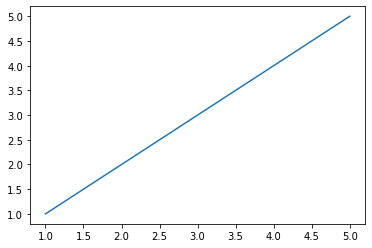

In [29]:
# Import Matplotlib
import matplotlib.pyplot as plt

# Add a new sheet called "Plots" after the "Data" sheet
plot_sht = wb.sheets.add('Plots', after='Data')

# Initialize figure
fig = plt.figure()

# Plot a line through (1, 1), (2, 2), (3, 3), (4, 4), and (5, 5)
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])

# Add the plot to the "Plots" sheet
plot_sht.pictures.add(fig, name='MyPlot', update=True)

You can see the name of the figure, `MyPlot`, just to the left of the formula bar in Excel if you click on the figure.

Note that if you set `update=True`, you can resize and position the plot in Excel. Subsequent calls to `pictures.add()` with the same name `MyPlot` will update the picture without changing its position or size.

---

## Classwork

Now that you've been introduced to some of the features of xlwings.  Complete the exercises below.

__Problem 1.__
Read about the `.join()` method for strings [here](https://realpython.com/python-string-split-concatenate-join/#going-from-a-list-to-a-string-in-python-with-join).

In the same folder as this notebook, there is an Excel workbook called `SectionList.xlsx` containing the roster for a fictional section.
Create a mailing list for all the midshipmen in the section: a single string containing everyone's e-mail address, separated by commas. Write the mailing list back to cell A1 in a worksheet named __Email__. The idea is that you can then copy and paste the list into Gmail.

Note that you'll need to appropriately convert the alpha codes to @usna.edu email addresses.

In [30]:
wb = xw.Book('SectionList.xlsx')
sht = wb.sheets['Sheet1']
alpha_list = sht.range('A2').expand('down').value

# Initialize the email list
email_list = []

# Loop through the alphas, add email addresses
for alpha in alpha_list:
    alpha_str = str(int(alpha))
    email = f'm{alpha_str}@usna.edu'
    email_list.append(email)
    
# Create the mailing list string
email_list_str = ','.join(email_list)

# Add a sheet called Email after the sheet called Sheet1
email_sht = wb.sheets.add('Email', after='Sheet1')

# Write the entire email address list to the cell A1 on sheet Email
email_sht.range('A1').value = email_list_str

__Problem 2.__
In the Excel workbook `Preferences.xlsx`, match the preferences for teaching times on the sheet named __Input__, which were captured chronologically, to the instructors listed alphabetically on the sheet named __Output__.  You should first clear the contents on the sheet __Output__ in the range B2:AE27, and then write the appropriate preferences next to each instructor on the sheet __Output__.

In [31]:
wb = xw.Book('Preferences.xlsx')
input_sht = wb.sheets['Input']
output_sht = wb.sheets['Output']

# Clear current contents in output worksheet
output_sht.range('B2:AE27').clear()

# Dynamically find the total number of instructors
inst = input_sht.range('A2').expand('down')
num_inst = len(inst)

# Iterate over the instructors in the input sheet
for i in range(num_inst):
    # Get name and preferences of current instructor
    cur_inst = wb.sheets['Input'].range(f'A{i + 2}').value
    cur_pref = wb.sheets['Input'].range(f'C{i + 2}:AF{i + 2}').value
    
    # Look for match in the output sheet
    # Write preferences for that person
    for j in range(num_inst):
        if wb.sheets['Output'].range(f'A{j + 2}').value == cur_inst:
            wb.sheets['Output'].range(f'B{j + 2}:AE{j + 2}').value = cur_pref

__Problem 3.__ (This problem is based on an example from _Automate the Boring Stuff with Python_ by Al Sweigart) 

Write code that updates the cells in the Excel workbook `updatedProduceSales.xlsx` as follows. Each row in the __Sheet1__ of the workbook represents an individual sale.  The columns contain the type of produce sold (A), the cost per pound of that produce (B), the number of pounds sold (C), and the total revenue from the sale (D).  The TOTAL column (column D) is set to the Excel formula `=ROUND(B3*C3, 2)`, which multiplies the cost per pound by the number of pounds sold and rounds the result to the nearest cent.  With this formula, the cells in the TOTAL column will automatically update themselves if there is a change in column B or C.

Let's assume that the prices of garlic, celery, and lemons were entered incorrectly, which would require someone to go through thousands of rows in the spreadsheet to update the cost per pound for any garlic, celery, and lemon rows.  You can't do a simple find-and-replace for the price because there may be other items with the same price that you don't want to update by mistake.  Your code should do the following:

 - Loop over all the rows.
 - For each row, if the value in column A is garlic, celery, or lemons, update the price in column B.

The prices you need to update are as follows:  Celery should be 1.19, Garlic should be 3.07, and Lemon should be 1.27.  There are several ways you could write the code to handle this situation.  You may want to store the corrected price information in a dictionary and write your code to use this data structure.

In [32]:
wb = xw.Book('updatedProduceSales.xlsx')
sht = wb.sheets['Sheet1']

# The produce types and their updated prices
PRICE_UPDATES = {
    'Garlic': 3.07,
    'Celery': 1.19,
    'Lemon': 1.27
}

# Figure out the number of rows of data
all_sales = sht.range('A2').expand('down')
num_rows = len(all_sales)

# Loop through the rows and update the prices
for r in range(2, num_rows + 2): # skip the first row
    produce_name = sht.range(f'A{r}').value
    if produce_name in PRICE_UPDATES:
        sht.range(f'B{r}').value = PRICE_UPDATES[produce_name]